In [56]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

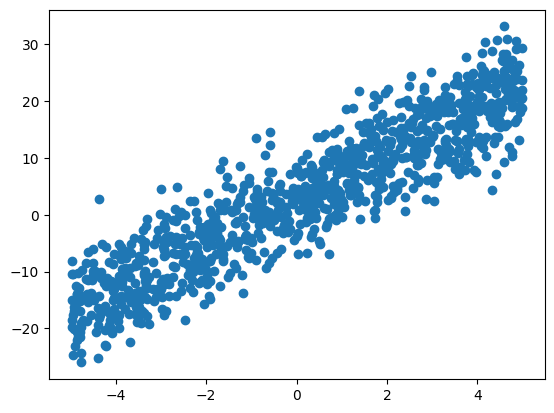

In [57]:
# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n)

plt.figure()
plt.scatter(
    X,
    Y
)


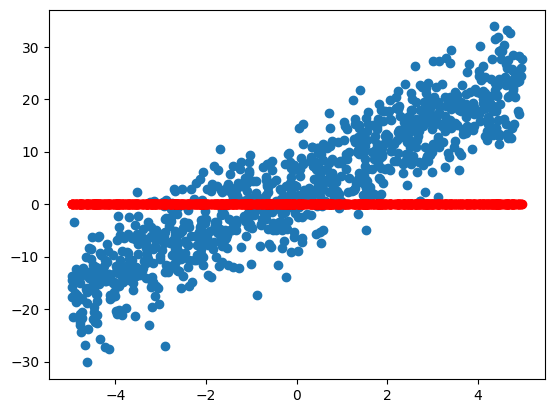

In [25]:
def Y_based_on_X(x,a,b):
  return a*x +b

# Gradient Descent
a,b = 0,0
l = 0.01

plt.figure()
plt.scatter(
    X,
    Y
)

plt.scatter(X,Y_based_on_X(X,a,b),c = "red")

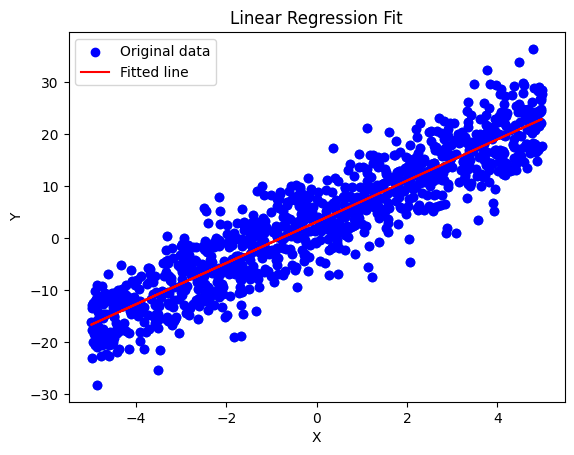

In [64]:
# Closed-Form Solution

# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt


# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n)

plt.figure()
plt.scatter(
    X,
    Y
)


X_0 = []
for i in range(n):
  X_0.append((1,X[i]))



X = np.array(X_0)
Y = np.array(Y).reshape(-1, 1)

# Closed-form solution (normal equation) using pseudo-inverse
beta = np.linalg.pinv(X.T @ X) @ X.T @ Y

# Extract parameters
b = beta[0, 0]
a = beta[1, 0]


# Plotting the linear regression line
plt.scatter(X[:, 1], Y, color='blue', label='Original data')  # X[:, 1] to get the original X values
plt.plot(X[:, 1], a * X[:, 1] + b, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

As you can see the values that we get for the model are extremely close to the 3 and 4 parameters that we initially set up.

TO TRY:
1. Try varying n and see how that affects the accuracy.
2. Implement the same using GD.
3. Implement the same using SGD with m = 100 and n = 1000.

#### By increasing n, the accuracy also increases. It improves from around 98% at n = 1000 to 99.7% at n = 100000.

#### Decreasing n, significantly decreases the accuracy.

3.902075458873341
3.105762028467625


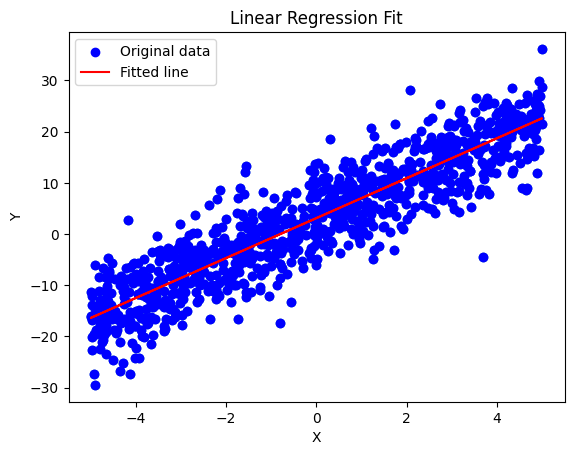

In [60]:
# Using gradient descent
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt


# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n)

plt.figure()
plt.scatter(
    X,
    Y
)



learning_rate = 0.01
min_size = 0.0001
max_steps = 1000
steps = 0
size = 1
a,b=0,0

while (steps < max_steps and size > min_size) :
  da , db = 0,0
  for i in range (n):
      da += -2*X[i]*(Y[i]-(a*X[i]+b))
      db += -2*(Y[i]-(a*X[i]+b))
  a = a - learning_rate*da/n
  b = b - learning_rate*db/n
  steps += 1
  size = learning_rate * max(abs(da),abs(db)) / n
print(a)
print(b)

plt.scatter(X, Y, color='blue', label='Original data')
plt.plot(X, a * X + b, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

3.924768979396981
2.778622948724118


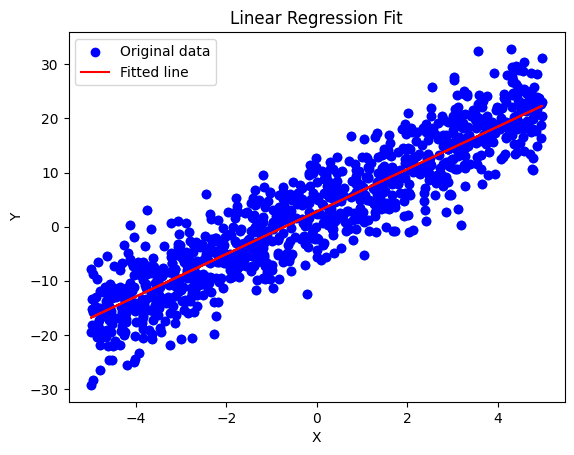

In [62]:
# Stochastic gradient descent
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt


# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n)

plt.figure()
plt.scatter(
    X,
    Y
)

m = 100
learning_rate = 0.01
min_size = 0.0001
max_steps = 1000
steps = 0
size = 1
a,b=0,0

while (steps < max_steps and size > min_size) :
  da , db = 0,0
  indices = np.random.choice(n,m,replace = False)
  for i in indices :
    da += -2*X[i]*(Y[i]-(a*X[i]+b))
    db += -2*(Y[i]-(a*X[i]+b))
  a = a - learning_rate*da/m
  b = b - learning_rate*db/m
  steps += 1
  size = learning_rate * max(abs(da),abs(db)) / m

print(a)
print(b)

plt.scatter(X, Y, color='blue', label='Original data')
plt.plot(X, a * X + b, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()